In [5]:
# Step 1: Importing necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Step 2: Loading the dataset
df = pd.read_csv(r'C:\Users\MMC\Desktop\spam.csv', encoding='latin-1')
print(df.head(10))

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...


In [22]:
# Step 3: Data cleaning and preprocessing
df = df[['Category', 'Message']]  # Category is label, Message is the text
df.columns = ['label', 'text']  # Renaming columns for clarity

# Converting labels to numeric (0 for ham/not spam, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [23]:
# Step 4: Text cleaning function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

# Applying text cleaning
df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df['cleaned_text'])


0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in a wkly comp to win fa cup final ...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                will ã¼ b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: cleaned_text, Length: 5572, dtype: object


In [25]:
# Step 5: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf.fit_transform(df['cleaned_text']).toarray()  # Transform cleaned text into numerical features

y = df['label']  # Target variable


In [26]:
# Step 6: Splitting the dataset into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 7: Model selection and training

# a) Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# b) Support Vector Machine Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [28]:
# Step 8: Model evaluation

# a) Naive Bayes results
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix (Naive Bayes): \n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report (Naive Bayes): \n", classification_report(y_test, y_pred_nb))

# b) SVM results
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix (SVM): \n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report (SVM): \n", classification_report(y_test, y_pred_svm))


Naive Bayes Accuracy:  0.9713004484304932
Confusion Matrix (Naive Bayes): 
 [[966   0]
 [ 32 117]]
Classification Report (Naive Bayes): 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

SVM Accuracy:  0.9883408071748879
Confusion Matrix (SVM): 
 [[966   0]
 [ 13 136]]
Classification Report (SVM): 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



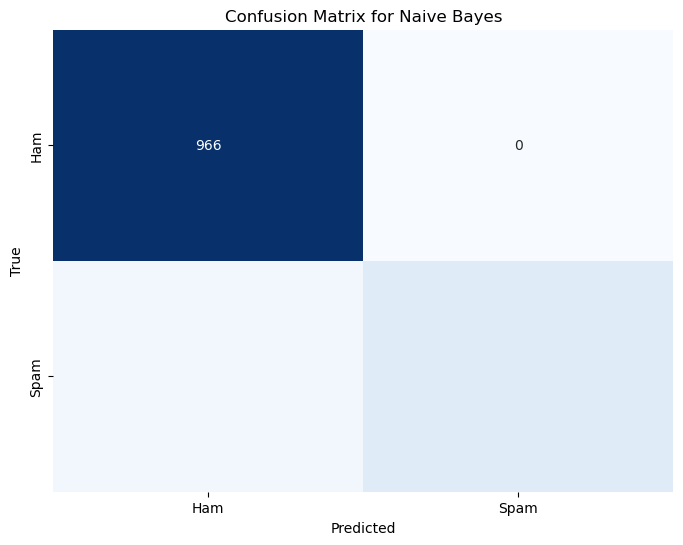

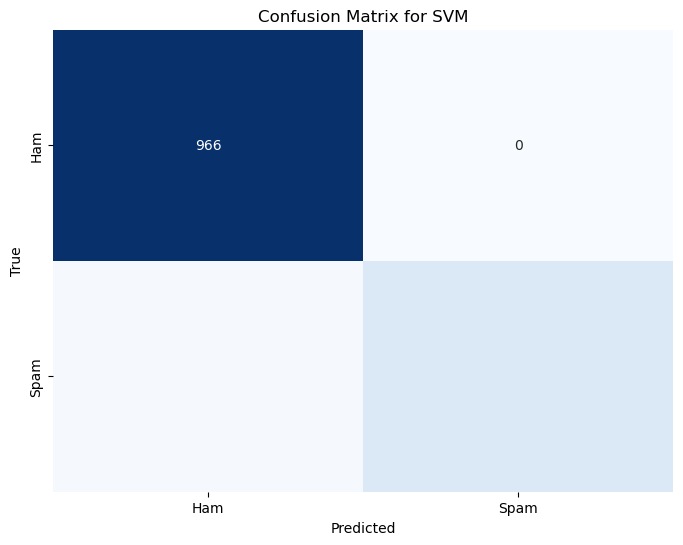

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


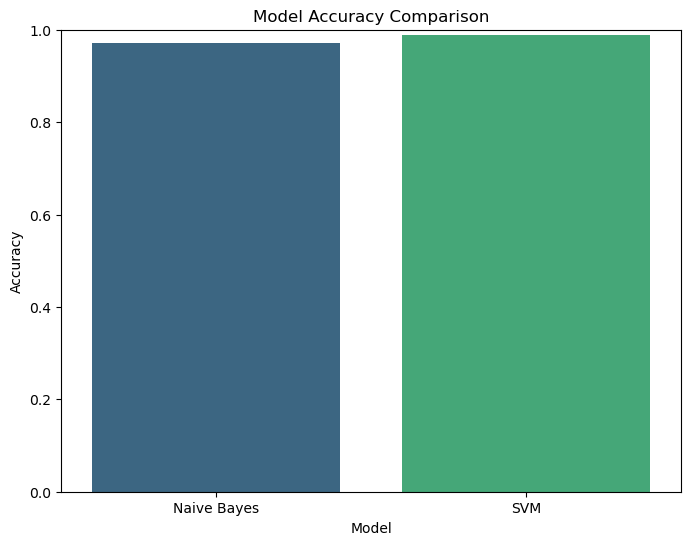

In [29]:
# Function to plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(nb_cm, title='Confusion Matrix for Naive Bayes')

# SVM Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(svm_cm, title='Confusion Matrix for SVM')

# Comparison of Accuracy
accuracies = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
